# Example Processing for High-resolution DEM
## Setup and Installation of Python environment
This Notebook and the Python Code to extract Connected Components from longitudinal river profiles requires several python modules to be installed.

Using `conda`, you can create your own environment *DEM_CC* and install the required modules (if you haven't done so already):
```
conda --create DEM_CC
conda activate DEM_CC
conda install -y pandas numpy geopandas rasterio matplotlib scipy kneed sklearn seaborn
```
You can do similar steps in your `pip` environment.

## Installation of LSDTopoTools
Furthermore, the Code requires an installed instance of LSDTopoTools2. A detailed inscription is on their [webpage(https://lsdtopotools.github.io/LSDTT_documentation/LSDTT_installation.html).

You can use the Docker version - but if you want full versability (and if you work on a Linux/Mac System), you may want to compile a local version. Running an Ubuntu 19.04 or 20.04 should allow you to install this locally (without much intervention). If you don't know what you are doing, likely the `docker` version is more useful.

```
cd ~
wget https://raw.githubusercontent.com/LSDtopotools/LSDTT_Edinburgh_scripts/master/LSDTT_native_linux_setup.sh
sh LSDTT_native_linux_setup.sh
```
Make sure to add this path to your environment variable PATH to call the various subscripts of LSDTopoTools.

    
## Installing DEM_ConnectedComponents
Download the most recent source code:

```
git clone https://github.com/UP-RS-ESP/DEM_ConnectedComponents.git
```

and install:
```
python setup.py install
```
    
# DEM Preprocessing
There are a few steps that need to be done before the `DEM_connectedcomponents` can be run. These include pre-processing steps with `LSDTopoTools` or a similar environment.

The DEM should be in a projected coordinate system (e.g., UTM).

## *lsdtt-chi-mapping 1*
Generate a chi map using `lsdtt-chi-mapping`. This requires a driver file and a DEM in binary format.

First, convert the DEM to BIL format (usually from GeoTIFF):
```
gdal_translate -of ENVI testClip_3m.tif testClip_3m.bil
```

Next, generate a driver file
```
read path: /home/bodo/DEM_ConnectedComponents
read fname: testClip_3m

write path: /home/bodo/DEM_ConnectedComponents
write fname: testClip_3m

# Parameter for filling the DEM
min_slope_for_fill: 0.0001

# print statements 
print_channels_to_csv: true
print_segmented_M_chi_map_to_csv: true
#print_junctions_to_csv: true

# method to extract channels
print_area_threshold_channels: true

# Parameters for selecting channels and basins
threshold_contributing_pixels: 1000
maximum_basin_size_pixels: 11111111
find_complete_basins_in_window: false
test_drainage_boundaries: false

# Parameters for chi analysis
A_0: 1
m_over_n: 0.45
n_iterations: 20
target_nodes: 80
minimum_segment_length: 10
sigma: 10.0
skip: 2
```

and run with:
```
lsdtt-chi-mapping testClip_3m.driver
```


## *lsdtt-chi-mapping 2*
Generate a chi map using `lsdtt-chi-mapping`. This requires a driver file and a DEM in binary format.

First, convert the DEM to BIL format (usually from GeoTIFF):
```
gdal_translate -of ENVI debrisBasins.tif debrisBasins.bil
```

Next, generate a driver file
```
read path: /home/bodo/DEM_ConnectedComponents
read fname: debrisBasins

write path: /home/bodo/DEM_ConnectedComponents
write fname: debrisBasins

# Parameter for filling the DEM
min_slope_for_fill: 0.0001

# print statements 
print_channels_to_csv: true
print_segmented_M_chi_map_to_csv: true
#print_junctions_to_csv: true

# method to extract channels
print_area_threshold_channels: true

# Parameters for selecting channels and basins
threshold_contributing_pixels: 1000
maximum_basin_size_pixels: 11111111
find_complete_basins_in_window: false
test_drainage_boundaries: false

# Parameters for chi analysis
A_0: 1
m_over_n: 0.45
n_iterations: 20
target_nodes: 80
minimum_segment_length: 10
sigma: 10.0
skip: 2
```

and run with:
```
lsdtt-chi-mapping debrisBasins.driver
```



# Run DEM_ConnectedComponents
First step is to merge outputs from LSDTT

Merging CSV files from LSDTopoTools...
Subsetting the input and sampling 20 random streams.
Testing a threshold of ±1 pixel(s).
Testing a threshold of ±2 pixel(s).
Testing a threshold of ±3 pixel(s).
Testing a threshold of ±4 pixel(s).
Testing a threshold of ±5 pixel(s).
Testing a threshold of ±6 pixel(s).
Testing a threshold of ±7 pixel(s).
Testing a threshold of ±8 pixel(s).
Testing a threshold of ±9 pixel(s).
Testing a threshold of ±10 pixel(s).
Testing a threshold of ±11 pixel(s).
Testing a threshold of ±12 pixel(s).
Testing a threshold of ±13 pixel(s).
Testing a threshold of ±14 pixel(s).
Testing a threshold of ±15 pixel(s).


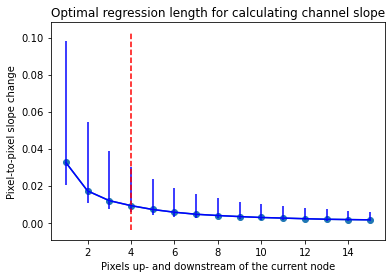

Out of the given pixel thresholds [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], I recommend taking the value 4.


In [3]:
from connectedComponentsFunctions import *

path = "/home/bodo/DEM_ConnectedComponents/"

#load output from LSDTT
lsdttTableTestClip = mergeLSDTToutput(fname = "testClip_3m", path = path, resolution=3, epsg = 32719)    
#find a good pixel threshold for calculating channel slope using 20 random channels within the study area
#taking only a hand-full of channels severely speeds up processing, yet I would reccoment to carefully select a single basin or use the entire study area for more accurate results
pixThr = findPixelThreshold(lsdttTableTestClip, sampleStreams = 20, thresholdRange = np.arange(1,16))


Merging CSV files from LSDTopoTools...
Testing a threshold of 0.15...
Processing basin 1/32
Processing basin 2/32
Processing channelhead 1/8
Processing channelhead 1/5
Processing basin 5/32
Processing basin 6/32
Processing basin 7/32
Processing channelhead 1/2
Processing basin 8/32
Processing channelhead 1/2
Processing channelhead 1/1
Processing channelhead 1/3
Processing basin 9/32
Processing basin 10/32
Processing basin 11/32
Processing channelhead 1/3
Processing channelhead 1/5
Processing basin 3/32
Processing basin 4/32
Processing channelhead 1/6
Processing basin 12/32
Processing basin 13/32
Processing channelhead 1/2
Processing channelhead 1/3
Processing channelhead 1/8
Processing channelhead 1/3
Processing basin 14/32
Processing channelhead 1/2
Processing basin 15/32
Processing basin 16/32
Processing basin 17/32
Processing basin 18/32
Processing channelhead 1/7
Processing channelhead 1/2
Processing channelhead 1/3
Processing channelhead 1/3
Processing basin 19/32
Processing basin

Processing channelhead 1/1
Processing basin 8/32
Processing channelhead 1/3
Processing basin 9/32
Processing basin 10/32
Processing channelhead 1/3
Processing channelhead 1/5
Processing basin 11/32
Processing channelhead 1/6
Processing basin 12/32
Processing channelhead 1/8
Processing basin 13/32
Processing basin 14/32
Processing channelhead 1/3
Processing channelhead 1/2
Processing basin 15/32
Processing channelhead 1/2
Processing basin 4/32
Processing basin 3/32
Processing channelhead 1/3
Processing channelhead 1/2
Processing basin 16/32
Processing basin 17/32
Processing channelhead 1/3
Processing basin 18/32
Processing channelhead 1/7
Processing channelhead 1/3
Processing basin 19/32
Processing channelhead 1/4
Processing basin 20/32
Processing basin 21/32
Processing channelhead 1/2
Processing basin 22/32
Processing channelhead 1/1
Processing channelhead 1/6
Processing basin 23/32
Processing basin 24/32
Processing channelhead 1/2
Processing channelhead 1/10
Processing basin 25/32
Pro

Processing basin 13/32
Processing basin 3/32
Processing channelhead 1/3
Processing channelhead 1/2
Processing basin 14/32
Processing channelhead 1/2
Processing basin 15/32
Processing basin 16/32
Processing channelhead 1/2
Processing channelhead 1/3
Processing basin 17/32
Processing basin 4/32
Processing channelhead 1/3
Processing channelhead 1/7
Processing basin 18/32
Processing channelhead 1/3
Processing basin 19/32
Processing channelhead 1/4
Processing basin 20/32
Processing channelhead 1/2
Processing basin 21/32
Processing basin 22/32
Processing channelhead 1/1
Processing channelhead 1/6
Processing basin 23/32
Processing channelhead 1/2
Processing basin 24/32
Processing basin 25/32
Processing channelhead 1/10
Processing channelhead 1/3
Processing basin 26/32
Processing channelhead 1/3
Processing basin 27/32
Processing channelhead 1/4
Processing basin 28/32
Processing channelhead 1/3
Processing basin 29/32
Processing basin 30/32
Processing channelhead 1/6
Processing basin 31/32
Proce

Processing channelhead 1/3
Processing basin 17/32
Processing channelhead 1/7
Processing basin 18/32
Processing basin 19/32
Processing channelhead 1/3
Processing channelhead 1/4
Processing basin 20/32
Processing channelhead 1/2
Processing basin 21/32
Processing channelhead 1/1
Processing basin 22/32
Processing channelhead 1/6
Processing basin 23/32
Processing channelhead 1/2
Processing basin 24/32
Processing channelhead 1/10
Processing basin 25/32
Processing channelhead 1/3
Processing basin 26/32
Processing basin 27/32
Processing channelhead 1/3
Processing channelhead 1/4
Processing basin 28/32
Processing channelhead 1/3
Processing basin 29/32
Processing channelhead 1/6
Processing basin 30/32
Processing channelhead 1/2
Processing basin 31/32
Processing channelhead 1/2
Processing basin 32/32
Processing channelhead 1/2
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/3
Processing channelhead 2/3
Processing channelhead 2/2
Processing

Processing channelhead 1/1
Processing channelhead 1/6
Processing basin 23/32
Processing channelhead 1/2
Processing basin 24/32
Processing channelhead 1/10
Processing basin 25/32
Processing channelhead 1/3
Processing basin 26/32
Processing basin 27/32
Processing channelhead 1/3
Processing basin 28/32
Processing channelhead 1/4
Processing basin 29/32
Processing channelhead 1/6
Processing channelhead 1/3
Processing basin 30/32
Processing basin 31/32
Processing channelhead 1/2
Processing channelhead 1/2
Processing basin 32/32
Processing channelhead 1/2
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/3
Processing channelhead 2/3
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/2
Processing channelhead 3/3
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/4
Processing channelhead 3/3
Processing channelhead 2/3
Processing ch

Processing basin 27/32
Processing basin 28/32
Processing channelhead 1/4
Processing channelhead 1/3
Processing basin 29/32
Processing basin 30/32
Processing channelhead 1/6
Processing channelhead 1/2
Processing basin 31/32
Processing channelhead 1/2
Processing basin 32/32
Processing channelhead 1/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/2
Processing channelhead 3/3
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/3
Processing channelhead 2/7
Processing channelhead 2/3
Processing channelhead 3/3
Processing channelhead 2/3
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 2/4
Processing channelhead 2/2
Processing channelhead 2/3
Processing channelhead 3/3
Processing channelhead 2/8
Processing channelhead 2/6
Processing channelhead 2/2
Processing channelhead 3/

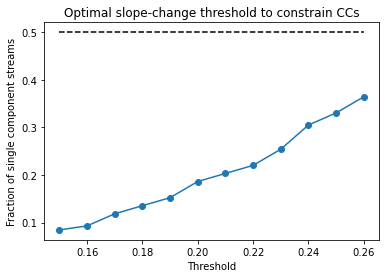

In [4]:
#get channel network of debris-flow sample regions 
lsdttTableDebrisSamples = mergeLSDTToutput(fname = "debrisBasins", path = path, resolution=3, epsg = 32719)   
#use debris-flow sample regions to get a good slope-change threshold to constrain CCs  
dSlopeThr = findDSlopeThreshold(lsdttTableDebrisSamples, pixThr = pixThr, thresholdRange = np.arange(0.15,0.26,0.01))


In [5]:
#run CC Analysis with optimal parameters for both channel networks
runCCAnalysis(fname = "testClip", path = path, lsdttTable = lsdttTableTestClip, pixThr = pixThr, dSlopeThr = dSlopeThr)
runCCAnalysis(fname = "debrisBasins", path = path, lsdttTable = lsdttTableDebrisSamples, pixThr = pixThr, dSlopeThr = dSlopeThr)


I found 43 catchments.
Processing basin 1/43
Processing channelhead 1/2
Processing basin 2/43
Processing channelhead 1/1368
Processing basin 3/43
Processing channelhead 1/5
Processing basin 5/43
Processing channelhead 1/2
Processing basin 4/43
Processing channelhead 1/14
Processing basin 6/43
Processing channelhead 1/16
Processing basin 7/43
Processing channelhead 1/3
Processing basin 8/43
Processing channelhead 1/4
Processing basin 9/43
Processing channelhead 1/5
Processing basin 10/43
Processing channelhead 1/4
Processing basin 11/43
Processing channelhead 1/3
Processing basin 12/43
Processing channelhead 1/2
Processing channelhead 2/2
Processing basin 13/43
Processing channelhead 1/2
Processing basin 14/43
Processing channelhead 1/5
Processing channelhead 2/3
Processing channelhead 2/3
Processing basin 15/43
Processing channelhead 1/4
Processing channelhead 2/2
Processing channelhead 3/3
Processing basin 16/43
Processing channelhead 1/2
Processing channelhead 2/5
Processing basin 17

Processing channelhead 43/57
Processing channelhead 44/57
Processing channelhead 45/57
Processing channelhead 2/1368
Processing channelhead 46/57
Processing channelhead 3/1368
Processing channelhead 4/1368
Processing channelhead 47/57
Processing channelhead 5/1368
Processing channelhead 48/57
Processing channelhead 49/57
Processing channelhead 50/57
Processing channelhead 51/57
Processing channelhead 52/57
Processing channelhead 53/57
Processing channelhead 54/57
Processing channelhead 55/57
Processing channelhead 56/57
Processing channelhead 57/57
Processing channelhead 6/1368
Processing channelhead 7/1368
Processing channelhead 8/1368
Processing channelhead 9/1368
Processing channelhead 10/1368
Processing channelhead 11/1368
Processing channelhead 12/1368
Processing channelhead 13/1368
Processing channelhead 14/1368
Processing channelhead 15/1368
Processing channelhead 16/1368
Processing channelhead 17/1368
Processing channelhead 18/1368
Processing channelhead 19/1368
Processing chan

Processing channelhead 248/1368
Processing channelhead 249/1368
Processing channelhead 250/1368
Processing channelhead 251/1368
Processing channelhead 252/1368
Processing channelhead 253/1368
Processing channelhead 254/1368
Processing channelhead 255/1368
Processing channelhead 256/1368
Processing channelhead 257/1368
Processing channelhead 258/1368
Processing channelhead 259/1368
Processing channelhead 260/1368
Processing channelhead 261/1368
Processing channelhead 262/1368
Processing channelhead 263/1368
Processing channelhead 264/1368
Processing channelhead 265/1368
Processing channelhead 266/1368
Processing channelhead 267/1368
Processing channelhead 268/1368
Processing channelhead 269/1368
Processing channelhead 270/1368
Processing channelhead 271/1368
Processing channelhead 272/1368
Processing channelhead 273/1368
Processing channelhead 274/1368
Processing channelhead 275/1368
Processing channelhead 276/1368
Processing channelhead 277/1368
Processing channelhead 278/1368
Processi

Processing channelhead 505/1368
Processing channelhead 506/1368
Processing channelhead 507/1368
Processing channelhead 508/1368
Processing channelhead 509/1368
Processing channelhead 510/1368
Processing channelhead 511/1368
Processing channelhead 512/1368
Processing channelhead 513/1368
Processing channelhead 514/1368
Processing channelhead 515/1368
Processing channelhead 516/1368
Processing channelhead 517/1368
Processing channelhead 518/1368
Processing channelhead 519/1368
Processing channelhead 520/1368
Processing channelhead 521/1368
Processing channelhead 522/1368
Processing channelhead 523/1368
Processing channelhead 524/1368
Processing channelhead 525/1368
Processing channelhead 526/1368
Processing channelhead 527/1368
Processing channelhead 528/1368
Processing channelhead 529/1368
Processing channelhead 530/1368
Processing channelhead 531/1368
Processing channelhead 532/1368
Processing channelhead 533/1368
Processing channelhead 534/1368
Processing channelhead 535/1368
Processi

Processing channelhead 762/1368
Processing channelhead 763/1368
Processing channelhead 764/1368
Processing channelhead 765/1368
Processing channelhead 766/1368
Processing channelhead 767/1368
Processing channelhead 768/1368
Processing channelhead 769/1368
Processing channelhead 770/1368
Processing channelhead 771/1368
Processing channelhead 772/1368
Processing channelhead 773/1368
Processing channelhead 774/1368
Processing channelhead 775/1368
Processing channelhead 776/1368
Processing channelhead 777/1368
Processing channelhead 778/1368
Processing channelhead 779/1368
Processing channelhead 780/1368
Processing channelhead 781/1368
Processing channelhead 782/1368
Processing channelhead 783/1368
Processing channelhead 784/1368
Processing channelhead 785/1368
Processing channelhead 786/1368
Processing channelhead 787/1368
Processing channelhead 788/1368
Processing channelhead 789/1368
Processing channelhead 790/1368
Processing channelhead 791/1368
Processing channelhead 792/1368
Processi

Processing channelhead 1018/1368
Processing channelhead 1019/1368
Processing channelhead 1020/1368
Processing channelhead 1021/1368
Processing channelhead 1022/1368
Processing channelhead 1023/1368
Processing channelhead 1024/1368
Processing channelhead 1025/1368
Processing channelhead 1026/1368
Processing channelhead 1027/1368
Processing channelhead 1028/1368
Processing channelhead 1029/1368
Processing channelhead 1030/1368
Processing channelhead 1031/1368
Processing channelhead 1032/1368
Processing channelhead 1033/1368
Processing channelhead 1034/1368
Processing channelhead 1035/1368
Processing channelhead 1036/1368
Processing channelhead 1037/1368
Processing channelhead 1038/1368
Processing channelhead 1039/1368
Processing channelhead 1040/1368
Processing channelhead 1041/1368
Processing channelhead 1042/1368
Processing channelhead 1043/1368
Processing channelhead 1044/1368
Processing channelhead 1045/1368
Processing channelhead 1046/1368
Processing channelhead 1047/1368
Processing

Processing channelhead 1267/1368
Processing channelhead 1268/1368
Processing channelhead 1269/1368
Processing channelhead 1270/1368
Processing channelhead 1271/1368
Processing channelhead 1272/1368
Processing channelhead 1273/1368
Processing channelhead 1274/1368
Processing channelhead 1275/1368
Processing channelhead 1276/1368
Processing channelhead 1277/1368
Processing channelhead 1278/1368
Processing channelhead 1279/1368
Processing channelhead 1280/1368
Processing channelhead 1281/1368
Processing channelhead 1282/1368
Processing channelhead 1283/1368
Processing channelhead 1284/1368
Processing channelhead 1285/1368
Processing channelhead 1286/1368
Processing channelhead 1287/1368
Processing channelhead 1288/1368
Processing channelhead 1289/1368
Processing channelhead 1290/1368
Processing channelhead 1291/1368
Processing channelhead 1292/1368
Processing channelhead 1293/1368
Processing channelhead 1294/1368
Processing channelhead 1295/1368
Processing channelhead 1296/1368
Processing

I am going to use debrisBasins_ConnectedComponents_4_nan_5.csv as debris-flow samples.
I am going to assign debris-flow similarity values to all CCs intestClip_ConnectedComponents_4_nan_5.csv


/home/bodo/miniconda3/envs/Py3_DEM/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


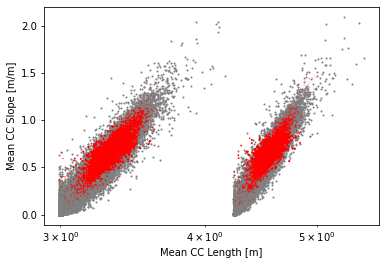

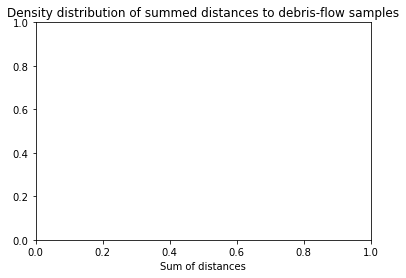

Clustering ...


/home/bodo/miniconda3/envs/Py3_DEM/lib/python3.8/site-packages/sklearn/utils/extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/bodo/miniconda3/envs/Py3_DEM/lib/python3.8/site-packages/sklearn/utils/extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:

#assign debris-flow similarity
dfsiValues = assignDFSI( path = path, allCCName = "testClip", debrisName = "debrisBasins", pixThr = pixThr, dSlopeThr = dSlopeThr)
#backsorting DFSI to stream network
backsorting(fname = "testClip", path = path, dfsiValues = dfsiValues, pixThr = pixThr, dSlopeThr = dSlopeThr)
